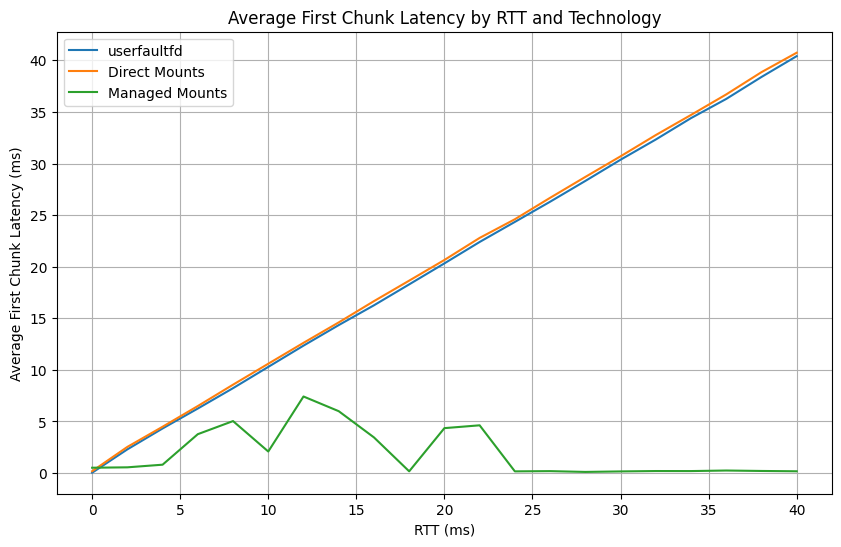

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../bench/latency-first-chunk-rttvar/results.csv')

# Convert the 'RTT (ms)' column to numerical format and perform forward fill for NaNs
df['RTT (ms)'] = df['RTT (ms)'].str.replace('ms', '').astype(float)
df['RTT (ms)'].fillna(method='ffill', inplace=True)

# Rename the columns to only include the technology name
df.rename(columns={
    'First Chunk Latency for userfaultfd (ns)': 'userfaultfd',
    'First Chunk Latency for Direct Mounts (ns)': 'Direct Mounts',
    'First Chunk Latency for Managed Mounts (ns)': 'Managed Mounts'
}, inplace=True)

# Convert latency from nanoseconds to milliseconds
df[['userfaultfd', 'Direct Mounts', 'Managed Mounts']] = df[['userfaultfd', 'Direct Mounts', 'Managed Mounts']] / 1e6

# Calculate average latency for each RTT
df_avg = df.groupby('RTT (ms)').mean().reset_index()

# Plot the data with different color scheme
plt.figure(figsize=(10, 6))
color_scheme = ['tab:blue', 'tab:orange', 'tab:green']  # color scheme

for i, technology in enumerate(['userfaultfd', 'Direct Mounts', 'Managed Mounts']):
    plt.plot(df_avg['RTT (ms)'], df_avg[technology], label=technology, color=color_scheme[i])

plt.xlabel('RTT (ms)')
plt.ylabel('Average First Chunk Latency (ms)')
plt.legend()
plt.grid(True)
plt.title('Average First Chunk Latency by RTT and Technology')
plt.show()